In [2]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import matplotlib.pyplot as plt
from models.kde.KDE import KDE

In [3]:
def generate_synth_data(plot=False):
    radius_large = 2
    num_points_large = 3000
    angles_large = 2 * np.pi * np.random.rand(num_points_large)
    radii_large = radius_large * np.sqrt(np.random.rand(num_points_large))
    x_large = radii_large * np.cos(angles_large)
    y_large = radii_large * np.sin(angles_large)

    radius_small = 0.3
    num_points_small = 500
    angles_small = 2 * np.pi * np.random.rand(num_points_small)
    radii_small = radius_small * np.sqrt(np.random.rand(num_points_small))
    x_small = 1 + radii_small * np.cos(angles_small)
    y_small = 1 + radii_small * np.sin(angles_small)

    x = np.concatenate([x_large, x_small])
    y = np.concatenate([y_large, y_small])

    noise_std = 0.15 
    x += np.random.normal(0, noise_std, x.shape)
    y += np.random.normal(0, noise_std, y.shape)

    if plot:
        plt.figure(figsize=(6, 6))
        plt.scatter(x, y, s=1)
        plt.xlim(-4, 4)
        plt.ylim(-4, 4)
        plt.grid(True)
        plt.title("Synthesized Data")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    return x, y

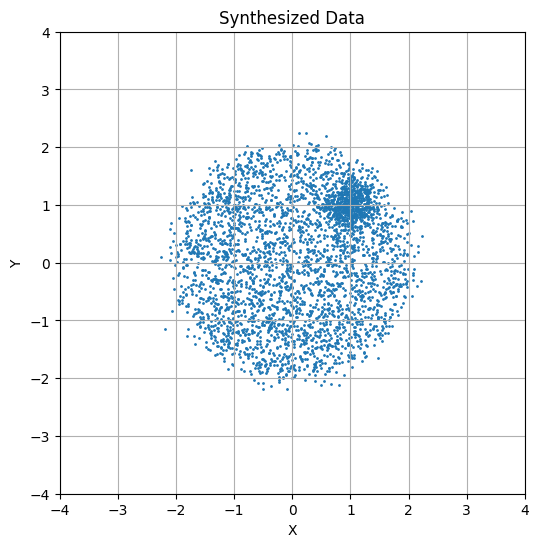

In [4]:
x, y = generate_synth_data(plot = True)
data = np.vstack((x,y)).T

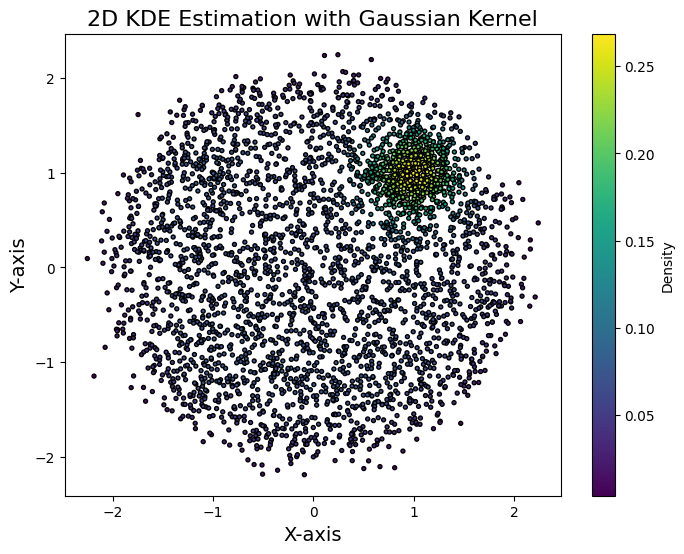

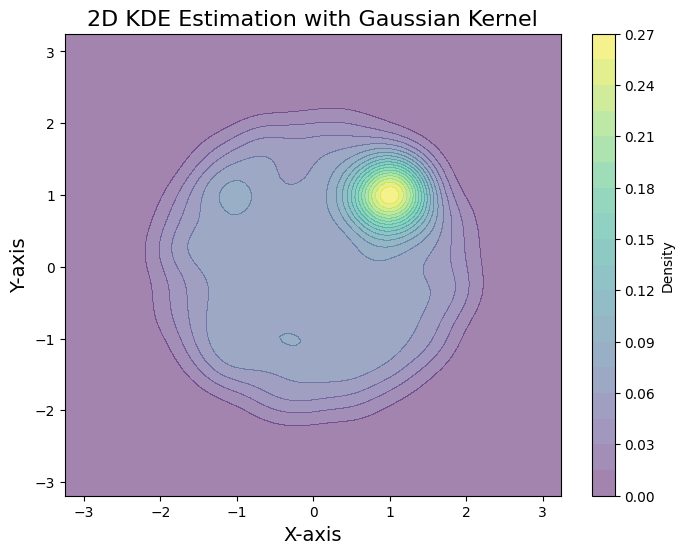

In [5]:
kde = KDE(kernel="gaussian")

kde.fit(data)
density = kde.predict(data)

kde.visualize(density)

In [6]:
from models.gmm.gmm import GMM

gmm2 = GMM(n_components=2)
gmm2.fit(data)
probs = gmm2.getMembership(data)
print(probs)

cluster = np.argmax(probs, axis=1)
print(cluster)

[[9.93781021e-02 9.00621898e-01]
 [7.96944878e-01 2.03055122e-01]
 [1.00000000e+00 1.31184602e-27]
 ...
 [2.24912143e-01 7.75087857e-01]
 [1.68520182e-01 8.31479818e-01]
 [4.42839936e-01 5.57160064e-01]]
[1 0 0 ... 1 1 1]


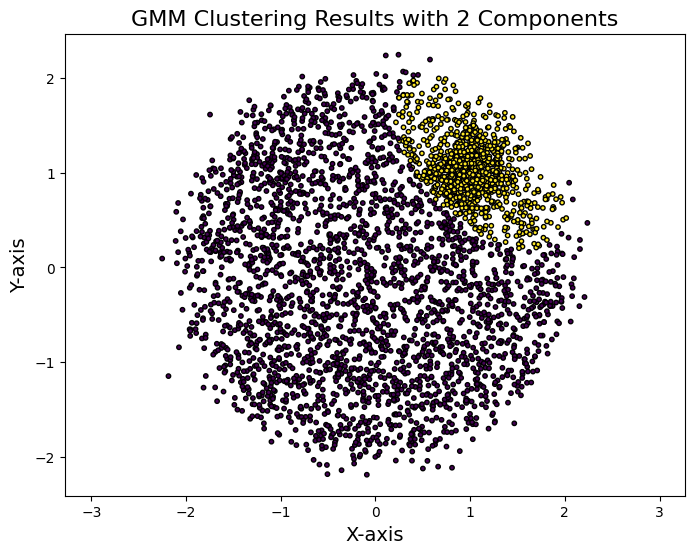

In [7]:
levels = np.digitize(probs, bins=np.linspace(0, 1, 10)) - 1

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster, s=10, cmap="viridis", edgecolor='k')
plt.title('GMM Clustering Results with 2 Components', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.axis('equal')
plt.show()

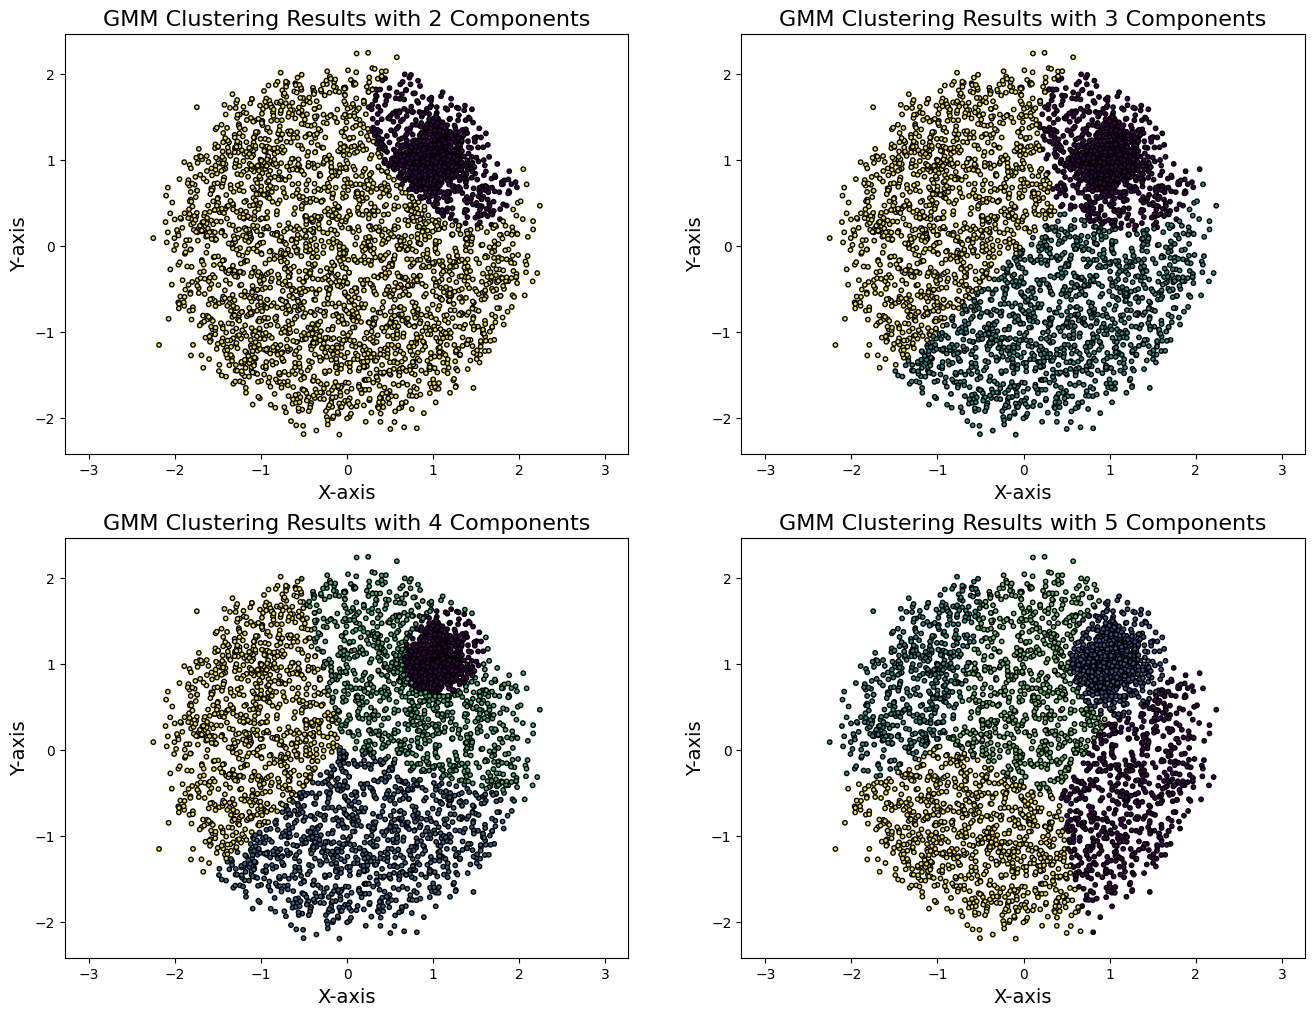

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for n in np.arange(2, 6):
    gmm = GMM(n_components=n)
    gmm.fit(data)

    
    prob = gmm.getMembership(data)

    clusters = np.argmax(prob, axis=1)

    levels = np.digitize(prob, bins=np.linspace(0, 1, 10)) - 1
    
    ax = axes[(n-2)//2, (n-2)%2]  # Select the correct subplot
    ax.scatter(data[:, 0], data[:, 1], c=clusters, s=10, cmap="viridis", edgecolor='k')
    ax.set_title(f'GMM Clustering Results with {n} Components', fontsize=16)
    ax.set_xlabel('X-axis', fontsize=14)
    ax.set_ylabel('Y-axis', fontsize=14)
    ax.axis('equal')

    del gmm

# Show the plots
plt.show()
